In [1]:
import pandas as pd 

In [ ]:
df = pd.read_csv('/path/to/Output10cases.csv',header=0)

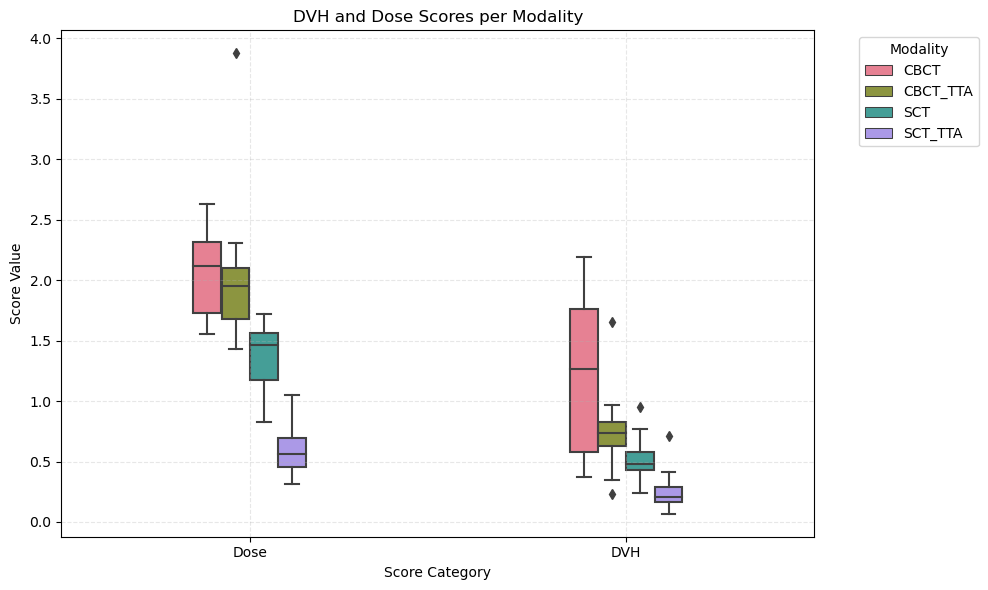

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Melt the DataFrame
df_melted = df.melt(
    id_vars='pid',
    value_vars=[col for col in df.columns if col != 'pid'],
    var_name='score_type',
    value_name='score_value'
)

# Step 2: Extract 'modality' and 'score_category' from column names
def extract_modality(name):
    parts = name.split('_')[2:]  # Skip "dose"/"dvh" and "score"
    return '_'.join(parts)  # e.g. "CBCT_TTA" or "SCT"

def extract_category(name):
    return 'DVH' if name.startswith('dvh') else 'Dose'

df_melted['modality'] = df_melted['score_type'].apply(extract_modality)
df_melted['score_category'] = df_melted['score_type'].apply(extract_category)

# Step 3: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_melted,
    x='score_category',
    y='score_value',
    hue='modality',
    width=0.3,
    showfliers=True,
    palette='husl'
)

plt.title('DVH and Dose Scores per Modality')
plt.ylabel('Score Value')
plt.xlabel('Score Category')
plt.legend(title='Modality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

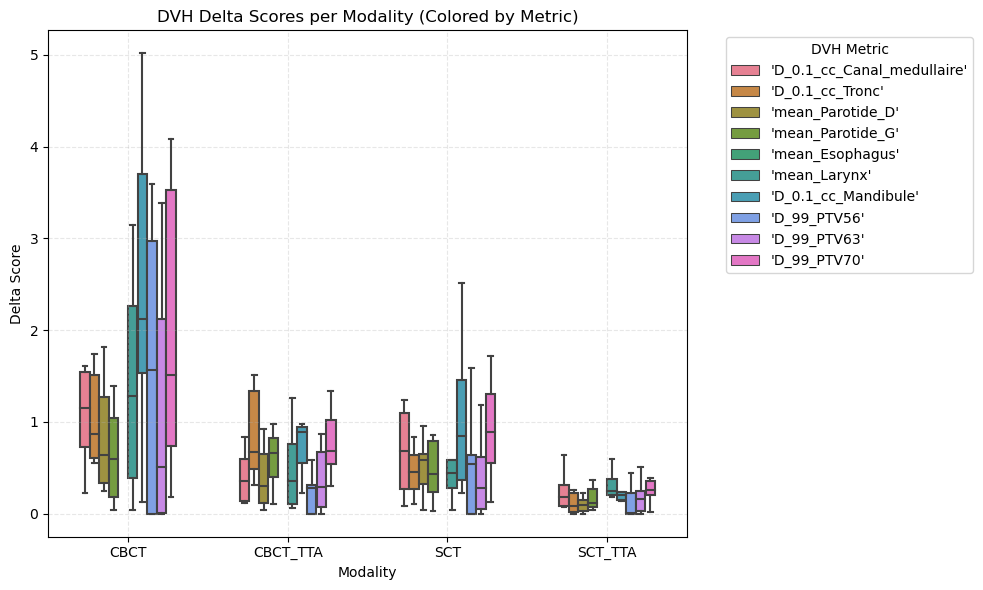

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/.../Output10casesDVH.csv')
# Melt the dataframe first (as before)
df.columns = [col.strip() for col in df.columns]
dvh_metric_columns = [col for col in df.columns if col not in ['pid', 'modality']]
df_melted = df.melt(id_vars=['pid', 'modality'],
                    value_vars=dvh_metric_columns,
                    var_name='metric',
                    value_name='delta_score')

# Plot: x-axis = modality, hue = metric (not modality!)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_melted,
    x='modality',
    y='delta_score',
    hue='metric',       # Color by metric, legend shows metric names
    showfliers=False,
    width=0.6,
    palette='husl'
)

plt.title("DVH Delta Scores per Modality (Colored by Metric)")
plt.xlabel("Modality")
plt.ylabel("Delta Score")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="DVH Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

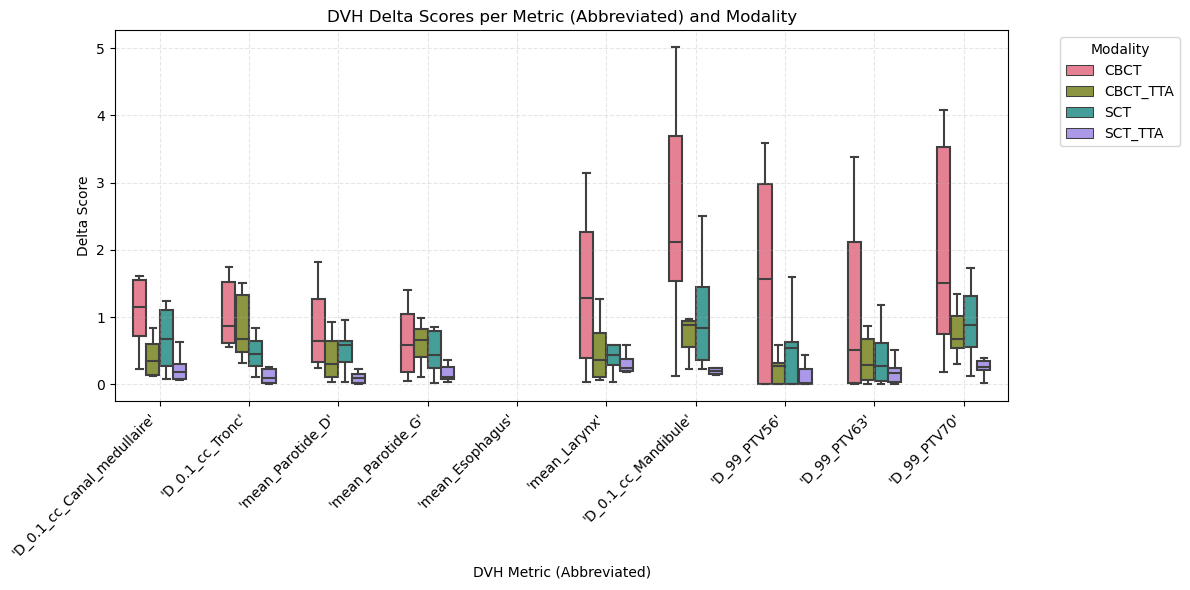

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/.../Output10casesDVH.csv')


# Strip whitespace from column names
df.columns = [col.strip() for col in df.columns]



df_melted = df.melt(id_vars=['pid', 'modality'],
                    value_vars=df.columns,
                    var_name='metric',
                    value_name='delta_score')


# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted,
    x='metric',
    y='delta_score',
    hue='modality',
    showfliers=False,
    width=0.6,
    palette = 'husl'
)

plt.title("DVH Delta Scores per Metric (Abbreviated) and Modality")
plt.xlabel("DVH Metric (Abbreviated)")
plt.ylabel("Delta Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Modality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Image simmilarity Metrics

In [ ]:
df = pd.read_csv('/.../image_similarity_results.csv',header=0)

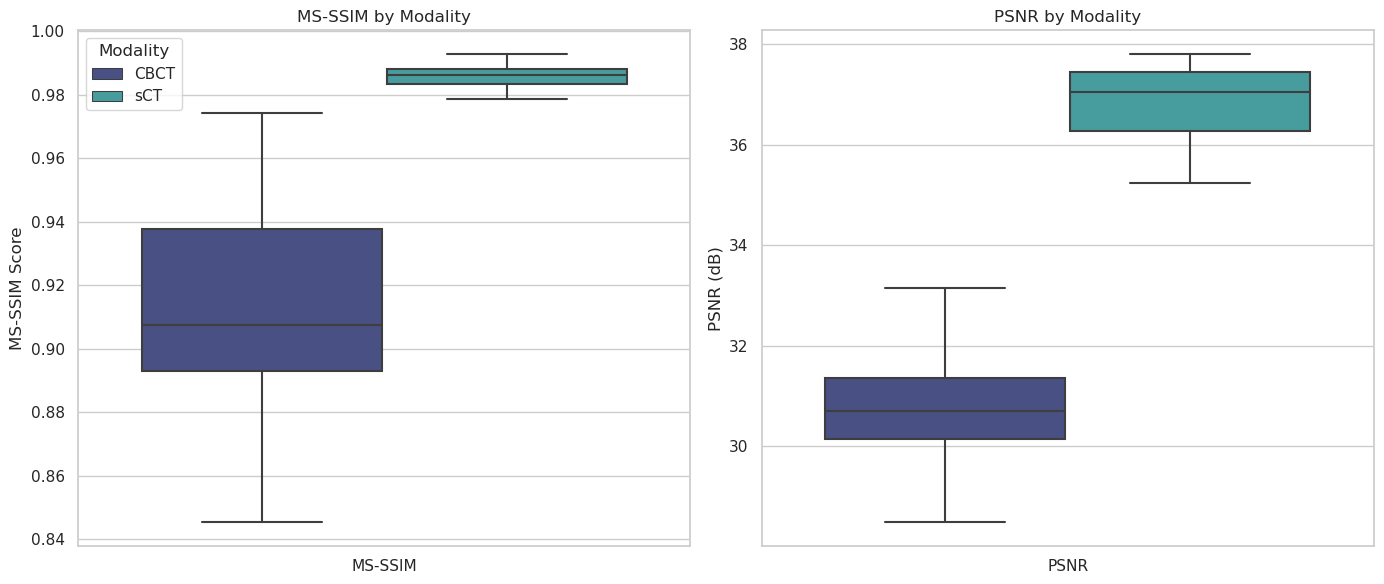

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape for plotting
df_long = pd.melt(
    df,
    id_vars=["PatientID"],
    value_vars=[
        "CBCT_CT_MS-SSIM", "sCT_CT_MS-SSIM",
        "CBCT_CT_PSNR", "sCT_CT_PSNR"
    ],
    var_name="MetricType",
    value_name="Score"
)

# Split into two new columns: Modality and Metric
df_long['Modality'] = df_long['MetricType'].apply(lambda x: x.split('_')[0])
df_long['Metric'] = df_long['MetricType'].apply(lambda x: x.split('_')[-1])

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# MS-SSIM Boxplot
sns.boxplot(
    data=df_long[df_long["Metric"] == "MS-SSIM"],
    x="Metric",
    y="Score",
    hue="Modality",
    palette="mako",
    ax=axes[0]
)
axes[0].set_title("MS-SSIM by Modality")
axes[0].set_ylabel("MS-SSIM Score")
axes[0].set_xlabel("")

# PSNR Boxplot
sns.boxplot(
    data=df_long[df_long["Metric"] == "PSNR"],
    x="Metric",
    y="Score",
    hue="Modality",
    palette="mako",
    ax=axes[1]
)
axes[1].set_title("PSNR by Modality")
axes[1].set_ylabel("PSNR (dB)")
axes[1].set_xlabel("")

# Adjust legends
axes[0].legend(title="Modality")
axes[1].legend_.remove()

# Tight layout
plt.tight_layout()
plt.show()